In [1]:
#에러 코드 핸들링

import os

import warnings

 

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
 

#디렉토리 -> numpy 변환

import cv2



# 이미지 -> 디렉토리 및 라벨링

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

 

#모델링

from keras.models import Sequential,load_model
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, experimental, Dropout

# from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd 


import datetime
 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

warnings.filterwarnings(action='ignore')
 


In [2]:
# 데이터 증폭

train_data_augmentation = ImageDataGenerator(

    validation_split = 0.2,

    rotation_range=10,

    zoom_range = 0.3,

    width_shift_range=0.2,

    height_shift_range=0.2)

#train 데이터 설정 

train_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=150,

        #color_mode ='rgb',

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical')


# validation 데이터 설정

validation_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=100,

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical',

        subset='validation')

 
#test 데이터 설정

test_data = ImageDataGenerator().flow_from_directory(

        './images2/test',

        classes = ['food','interior', 'exterior'],

        target_size=(300,300),

        batch_size=25,

        class_mode='categorical')


Found 38752 images belonging to 3 classes.
Found 7749 images belonging to 3 classes.
Found 6248 images belonging to 3 classes.


# Model - 201814132

In [3]:
model = Sequential([

Input(shape=(300,300,3), name='input_layer'),

experimental.preprocessing.Rescaling(1./255),

Conv2D(32,(3,3), activation='relu',name='Conv_layer1'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),
    

Conv2D(96,(3,3), activation='relu',name='Conv_layer3'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),

 

Conv2D(64,(3,3), activation='relu',name='Conv_layer5'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'),
    

Dropout(0.5),

Conv2D(128,(3,3), activation='relu',name='Conv_layer7'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer8'),

Flatten(),

Dense(160, activation='relu',name='FC_layer9', kernel_initializer='glorot_uniform',),

Dense(20, activation='relu',name='FC_layer10', kernel_initializer='glorot_uniform',),

Dense(3, activation='softmax', name='output_layer11')

])

 

 

# 3. 모델 학습과정 설정 및 요약

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






a = datetime.datetime.now()
print('fitting start', a)

# 4. 모델 학습
def model_():
    history = model.fit(

        train_data,

        steps_per_epoch=15,

        epochs=30,

        validation_data=validation_data,

        validation_steps=10)


    return history


model.save('model-201814132')
b = datetime.datetime.now()
history = model_()
print('Fitting End', b)
print('Fitting Time =' , b-a)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 96)      27744     
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 96)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 64)        55360     
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 64)        0

In [4]:

model.save('model-201814132')

INFO:tensorflow:Assets written to: Model_Go_XX7\assets


In [5]:

history = model_()
def plot_loss_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['loss'])

    plt.plot(history['val_loss'])


    plt.title('model loss')

    plt.xlabel('epoch')

    plt.ylabel('loss')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show

    
def plot_accuracy_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['accuracy'])

    plt.plot(history['val_accuracy'])


    plt.title('model accuracy')

    plt.xlabel('epoch')

    plt.ylabel('accuracy')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show
    

Epoch 1/30
15/15 [==============================] - 207s 14s/step - loss: 0.5060 - accuracy: 0.7973 - val_loss: 0.5974 - val_accuracy: 0.7510
Epoch 2/30
15/15 [==============================] - 204s 14s/step - loss: 0.5588 - accuracy: 0.7684 - val_loss: 0.5824 - val_accuracy: 0.7830
Epoch 3/30
15/15 [==============================] - 205s 14s/step - loss: 0.5115 - accuracy: 0.7982 - val_loss: 0.5896 - val_accuracy: 0.7760
Epoch 4/30
15/15 [==============================] - 205s 14s/step - loss: 0.5252 - accuracy: 0.7938 - val_loss: 0.6183 - val_accuracy: 0.7340
Epoch 5/30
15/15 [==============================] - 205s 14s/step - loss: 0.5308 - accuracy: 0.7751 - val_loss: 0.5818 - val_accuracy: 0.7800
Epoch 6/30
15/15 [==============================] - 204s 14s/step - loss: 0.5282 - accuracy: 0.7916 - val_loss: 0.5564 - val_accuracy: 0.8140
Epoch 7/30
15/15 [==============================] - 206s 14s/step - loss: 0.5023 - accuracy: 0.8076 - val_loss: 0.5071 - val_accuracy: 0.8070
Epoch 

train accuracy =0.82667 , validation accuracy =0.826
train loss =0.45478 ,     validation loss =0.49428


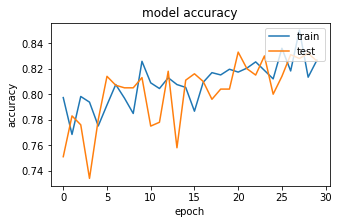

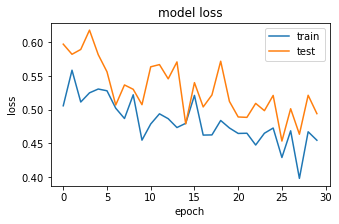

In [6]:
plot_accuracy_curve(history.history)

print('train accuracy ={} , validation accuracy ={}' .format(
                                                            round(history.history['accuracy'][-1],5), 
                                                            round(history.history['val_accuracy'][-1],5) ))
plot_loss_curve(history.history)
print('train loss ={} ,     validation loss ={}' .format(
                                                        round(history.history['loss'][-1],5), 
                                                        round(history.history['val_loss'][-1],5) ))